# Intro

Preprocessing consist in label images with their specific group (AD, MCI, CN) and reshape images.

# Setup

In [1]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob2
import skimage
from skimage import transform

%matplotlib inline

# Compile metadata with images

Matches NiFTi files to the master metadata file provided by ADNI and segregates them to a folder denoting their appropriate class label (AD, MCI, CN)

## Read csv

In [2]:
files_needed = []
adni_patients = pd.read_csv('../data/ADNI_data/ADNI1_Annual_2_Yr_3T_8_21_2020.csv')
adni_patients

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I143856,136_S_1227,MCI,F,67,6,MRI,MPR; ; N3; Scaled,Processed,3/23/2009,NiFTI,NaN
1,I99265,136_S_1227,MCI,F,66,4,MRI,MPR; ; N3; Scaled,Processed,3/06/2008,NiFTI,NaN
2,I66824,136_S_1227,MCI,F,65,2,MRI,MPR; ; N3; Scaled,Processed,2/21/2007,NiFTI,NaN
3,I40404,136_S_0579,MCI,F,66,2,MRI,MPR-R; ; N3; Scaled,Processed,7/10/2006,NiFTI,NaN
4,I119735,136_S_0579,MCI,F,66,2,MRI,MPR-R; ; N3; Scaled_2,Processed,7/10/2006,NiFTI,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
301,I45126,002_S_0559,CN,M,79,2,MRI,MPR; ; N3; Scaled,Processed,6/27/2006,NiFTI,NaN
302,I64551,002_S_0413,CN,F,77,4,MRI,MPR; ; N3; Scaled,Processed,6/01/2007,NiFTI,NaN
303,I118675,002_S_0413,CN,F,76,2,MRI,MPR; ; N3; Scaled_2,Processed,5/19/2006,NiFTI,NaN
304,I40657,002_S_0413,CN,F,76,2,MRI,MPR; ; N3; Scaled,Processed,5/19/2006,NiFTI,NaN


## Loading and labeling images

In [3]:
curr_dir = os.getcwd()

os.chdir("Documents/projet_final/project/data/sample/AD")
AD_files = [val for sublist in [[os.path.join(i[0], j) for j in i[2]] for i in os.walk('./')] for val in sublist]
os.chdir("Documents/projet_final/project/data/sample/CN")
CN_files = [val for sublist in [[os.path.join(i[0], j) for j in i[2]] for i in os.walk('./')] for val in sublist]
os.chdir("Documents/projet_final/project/data/sample/MCI/")
MCI_files = [val for sublist in [[os.path.join(i[0], j) for j in i[2]] for i in os.walk('./')] for val in sublist]



os.chdir(curr_dir)

total_files = AD_files + CN_files + MCI_files
data = []

for z in total_files: 
    data.append(z)


names    = []
labels   = []
images   = []
ages     = []
gender   = []
image_id = []

AD_data_path = "Documents/projet_final/project/data/sample/AD"
MCI_data_path = "Documents/projet_final/project/data/sample/MCI/"
CN_data_path = "Documents/projet_final/project/data/sample/CN"


for y in data:
    extracted_row = adni_patients.loc[adni_patients["Image Data ID"] == y.split('_')[-1].split('.')[0]]

    print(extracted_row)

    if(extracted_row["Group"].iloc[0] == "MCI"):
        labels.append(0)  #Indecation its MCI 
        im = nib.load(os.path.join(MCI_data_path,y[2:]))
        images.append(im)
        image_id.append((y.split('_')[-1].split('.')[0]))
        name = y.split("_")[1]+"_"+y.split("_")[2]+"_" + y.split("_")[3]
        names.append(name)
        # Encoding Sex
        if (extracted_row['Sex'].iloc[0] == 'F'): 
            gender.append(0)
        elif (extracted_row['Sex'].iloc[0]  == 'M'):
            gender.append(1)
        ages.append(extracted_row['Age'].iloc[0])
        
    elif(extracted_row["Group"].iloc[0] == "AD"):
        labels.append(1)  #Indecation its AD
        im = nib.load(os.path.join(AD_data_path,y[2:]))
        images.append(im)
        image_id.append((y.split('_')[-1].split('.')[0]))
        name = y.split("_")[1]+"_"+y.split("_")[2]+"_" + y.split("_")[3]
        names.append(name)
        #Encoding Sex
        if (extracted_row['Sex'].iloc[0]  == 'F'):
            gender.append(0)
        elif (extracted_row['Sex'].iloc[0]  == 'M'):
            gender.append(1)
        ages.append(extracted_row['Age'].iloc[0])
        
    elif (extracted_row["Group"].iloc[0] == "CN"):
        labels.append(2)  #Indecation its CN
        im = nib.load(os.path.join(CN_data_path,y[2:]))
        images.append(im)
        image_id.append((y.split('_')[-1].split('.')[0]))
        name = y.split("_")[1]+"_"+y.split("_")[2]+"_" + y.split("_")[3]
        names.append(name)
        #Encoding Sex
        if (extracted_row['Sex'].iloc[0]  == 'F'):
            gender.append(0)
        elif (extracted_row['Sex'].iloc[0]  == 'M'):
            gender.append(1)
        ages.append(extracted_row['Age'].iloc[0])

    Image Data ID     Subject Group Sex  Age  Visit Modality  \
293        I40828  002_S_1018    AD   F   71      2      MRI   

           Description       Type    Acq Date Format Downloaded  
293  MPR; ; N3; Scaled  Processed  12/18/2006  NiFTI        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
292        I97022  002_S_1018    AD   F   72      4      MRI   

           Description       Type    Acq Date Format Downloaded  
292  MPR; ; N3; Scaled  Processed  12/07/2007  NiFTI        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
291       I132795  002_S_1018    AD   F   73      6      MRI   

           Description       Type    Acq Date Format Downloaded  
291  MPR; ; N3; Scaled  Processed  12/12/2008  NiFTI        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
264        I74600  005_S_0814    AD   F   71      2      MRI   

                                  Description       Type   Acq Date Format  \
264  MPR; 

   Image Data ID     Subject Group Sex  Age  Visit Modality  \
16       I120436  136_S_0300    AD   M   59      6      MRI   

          Description       Type   Acq Date Format Downloaded  
16  MPR; ; N3; Scaled  Processed  5/19/2008  NiFTI        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
13       I119731  136_S_0426    AD   M   80      2      MRI   

            Description       Type   Acq Date Format Downloaded  
13  MPR; ; N3; Scaled_2  Processed  5/30/2006  NiFTI        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
12        I40378  136_S_0426    AD   M   80      2      MRI   

          Description       Type   Acq Date Format Downloaded  
12  MPR; ; N3; Scaled  Processed  5/30/2006  NiFTI        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
14        I66787  136_S_0426    AD   M   81      4      MRI   

          Description       Type   Acq Date Format Downloaded  
14  MPR; ; N3; Scaled  Processed  6/04/2

    Image Data ID     Subject Group Sex  Age  Visit Modality  \
176       I118904  023_S_0963    CN   M   73      2      MRI   

                                      Description       Type    Acq Date  \
176  MPR-R; GradWarp; B1 Correction; N3; Scaled_2  Processed  10/17/2006   

    Format Downloaded  
176  NiFTI        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
175        I90026  023_S_0963    CN   M   73      2      MRI   

                                    Description       Type    Acq Date Format  \
175  MPR-R; GradWarp; B1 Correction; N3; Scaled  Processed  10/17/2006  NiFTI   

    Downloaded  
175        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
174        I82205  023_S_0963    CN   M   74      4      MRI   

                                  Description       Type    Acq Date Format  \
174  MPR; GradWarp; B1 Correction; N3; Scaled  Processed  10/11/2007  NiFTI   

    Downloaded  
174        NaN  
    Image Data ID     

82  MPR; ; N3; Scaled  Processed  3/07/2007  NiFTI        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
80        I96312  100_S_1286    CN   F   77      4      MRI   

          Description       Type   Acq Date Format Downloaded  
80  MPR; ; N3; Scaled  Processed  2/11/2008  NiFTI        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
81       I149636  100_S_1286    CN   F   78      6      MRI   

          Description       Type   Acq Date Format Downloaded  
81  MPR; ; N3; Scaled  Processed  3/17/2009  NiFTI        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
77        I53802  116_S_0382    CN   F   76      2      MRI   

                                 Description       Type   Acq Date Format  \
77  MPR; GradWarp; B1 Correction; N3; Scaled  Processed  6/13/2006  NiFTI   

   Downloaded  
77        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
79        I87739  116_S_0382    CN   F   77      

273        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
275       I109196  005_S_0448   MCI   M   88      6      MRI   

                                  Description       Type   Acq Date Format  \
275  MPR; GradWarp; B1 Correction; N3; Scaled  Processed  6/03/2008  NiFTI   

    Downloaded  
275        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
268        I32817  005_S_0572   MCI   M   79      2      MRI   

                                    Description       Type   Acq Date Format  \
268  MPR-R; GradWarp; B1 Correction; N3; Scaled  Processed  7/31/2006  NiFTI   

    Downloaded  
268        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
269        I86030  005_S_0572   MCI   M   80      4      MRI   

                                    Description       Type   Acq Date Format  \
269  MPR-R; GradWarp; B1 Correction; N3; Scaled  Processed  7/09/2007  NiFTI   

    Downloaded  
269        NaN  
    Image Data 

160        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
159        I52138  023_S_1247   MCI   F   73      2      MRI   

                                  Description       Type   Acq Date Format  \
159  MPR; GradWarp; B1 Correction; N3; Scaled  Processed  2/21/2007  NiFTI   

    Downloaded  
159        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
158        I91703  023_S_1247   MCI   F   74      4      MRI   

                                  Description       Type   Acq Date Format  \
158  MPR; GradWarp; B1 Correction; N3; Scaled  Processed  1/29/2008  NiFTI   

    Downloaded  
158        NaN  
    Image Data ID     Subject Group Sex  Age  Visit Modality  \
151        I34168  027_S_0307   MCI   M   79      2      MRI   

                                  Description       Type   Acq Date Format  \
151  MPR; GradWarp; B1 Correction; N3; Scaled  Processed  5/11/2006  NiFTI   

    Downloaded  
151        NaN  
    Image Data ID     S

   Image Data ID     Subject Group Sex  Age  Visit Modality  \
98       I132918  053_S_0507   MCI   F   57      6      MRI   

                                  Description       Type   Acq Date Format  \
98  MPR; ; N3; Scaled; No phantom for scaling  Processed  6/11/2008  NiFTI   

   Downloaded  
98        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
95       I119201  067_S_0290   MCI   M   75      2      MRI   

                                     Description       Type   Acq Date Format  \
95  MPR-R; GradWarp; B1 Correction; N3; Scaled_2  Processed  6/01/2006  NiFTI   

   Downloaded  
95        NaN  
   Image Data ID     Subject Group Sex  Age  Visit Modality  \
96        I72427  067_S_0290   MCI   M   77      4      MRI   

                                   Description       Type   Acq Date Format  \
96  MPR-R; GradWarp; B1 Correction; N3; Scaled  Processed  6/15/2007  NiFTI   

   Downloaded  
96        NaN  
   Image Data ID     Subject Group Sex  Age 

## New dataframe

### Label:
* MCI = 0
* AD = 1
* CN = 2

### Genders:
* Female = 0
* Male = 1


In [4]:
df = pd.DataFrame(columns=('Name','Image_ID', 'Image','Gender','Age', 'Label'))
for i in range(len(data)):
    df.loc[i] = [names[i],image_id[i],images[i],gender[i],ages[i],labels[i]]

In [5]:
df

,Name,Image_ID,Image,Gender,Age,Label
0,002_S_1018,I40828,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,71,1
1,002_S_1018,I97022,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,72,1
2,002_S_1018,I132795,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,73,1
3,005_S_0814,I74600,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,71,1
4,005_S_0814,I85469,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,72,1
...,...,...,...,...,...,...
301,136_S_0579,I83554,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,66,0
302,136_S_0579,I120618,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,68,0
303,136_S_1227,I66824,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,65,0
304,136_S_1227,I99265,<class 'nibabel.nifti1.Nifti1Image'>\ndata sha...,0,66,0


Images are associated with their Group, Sex and Age 

# Images before re-shape

In [10]:
master_dir = os.path.join('Documents/projet_final/project/data/sample')
data = glob2.glob(master_dir + '/**/*.nii')
#print(data)

(256, 170)
256


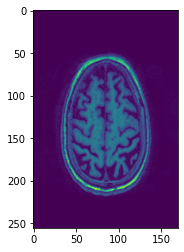

In [11]:
im = nib.load(data[10]).get_fdata()
plt.imshow(im[85])
print(im[10].shape)
print(len(im))

In [12]:
im

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

# Create new folders for pre-processed images

In [6]:
if not os.path.exists('Documents/projet_final/project/data/sample/AD-numpyArr'):
    os.makedirs('Documents/projet_final/project/data/sample/AD-numpyArr')
    
if not os.path.exists('Documents/projet_final/project/data/sample/CN-numpyArr'):
    os.makedirs('Documents/projet_final/project/data/sample/CN-numpyArr')
    
if not os.path.exists('Documents/projet_final/data/sample/MCI-numpyArr'):
    os.makedirs('Documents/projet_final/project/data/sample/MCI-numpyArr')

# Image labeling and Resize to shape of 21,42,42

In [7]:
ad_data_dir='Documents/projet_final/project/data/sample/AD-numpyArr'
cn_data_dir='Documents/projet_final/project/data/sample/CN-numpyArr'
mci_data_dir='Documents/projet_final/project/data/sample/MCI-numpyArr'


index_of_null = df['Image'][df['Image'].isnull()].index
        

converted_shape = (21,42,42)

#labeling and object formation

for row_index in range(0,len(df)):
    if row_index in df['Image'][index_of_null]:
        continue
    else:
        netdata=[]  # will be used for numpy object                                            
        # loading the image
        img = df.loc[row_index]['Image']  
        # accessing image array
        img = img.get_fdata()  
        #resizing the image to dimensions(21,42,42)
        img = skimage.transform.resize(img, (converted_shape))
        #labeling by one hot encoding
        label = df.loc[row_index]['Label']
        if label == 0:
            labelar = np.array([1, 0, 0])
            netdata.append([img, labelar])
            #save numpy object
            np.save(os.path.join(mci_data_dir, df.loc[row_index]['Image_ID']), netdata)
        elif label == 1:
            labelar = np.array([0, 1, 0])
            netdata.append([img, labelar])
            np.save(os.path.join(ad_data_dir, df.loc[row_index]['Image_ID']), netdata)
        elif label == 2:
            labelar = np.array([0, 0, 1])
            netdata.append([img, labelar])
            np.save(os.path.join(cn_data_dir, df.loc[row_index]['Image_ID']), netdata)

C:\ProgramData\Anaconda3\envs\projet_simplon\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


We created a numpy object for our images. They are now in another format '.npy'

# Images after re-shape

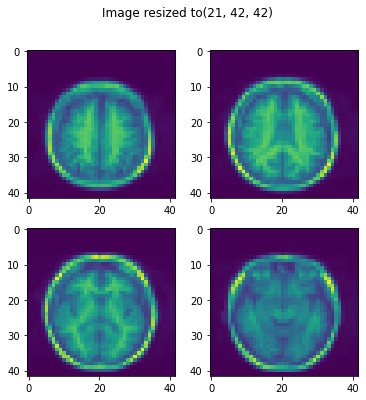

In [12]:
datanp=[]                               #images
truenp=[]                               #labels

data_dir = 'Documents/projet_final/project/data/sample/CN-numpyArr'
for file in os.listdir(data_dir):
    data=np.load(os.path.join(data_dir,file),allow_pickle=True)
    datanp.append((data[0][0]))
    truenp.append(data[0][1])
    
img = datanp[0]  # loading the image
                    
fig, axs1 = plt.subplots(2, 2,figsize= (6,6))

fig.suptitle('Image resized to'+str(img.shape))
i = 7
axs1[0, 0].imshow(img[i])

axs1[0, 1].imshow(img[i+1])

axs1[1, 0].imshow(img[i+2])

axs1[1, 1].imshow(img[i+3])

# np = [] 
# import numpy as lalala
# data =np.load(os.path.join(data_dir,file),allow_pickle = True)

In [13]:
img

array([[[8.58956839e-03, 6.73621981e-03, 1.25540227e-02, ...,
         4.52340195e-03, 2.87797554e-04, 4.39910417e-03],
        [1.15779413e-01, 7.60759100e-02, 1.98201277e-01, ...,
         1.05336141e-01, 1.22701215e-02, 1.10556656e-01],
        [9.56540643e-02, 7.87001428e-02, 8.94171862e-02, ...,
         8.26516251e-02, 2.74392629e-02, 9.93207131e-02],
        ...,
        [5.26696692e-02, 1.89638825e-01, 1.95478611e-01, ...,
         8.80296512e-01, 2.82314878e-01, 4.13379347e-02],
        [7.37493063e-02, 4.68749722e-02, 5.36350223e-02, ...,
         3.68642870e-01, 1.41262453e-01, 2.53132429e-02],
        [9.02819234e-04, 3.81091196e-04, 4.25151691e-04, ...,
         3.54495171e-03, 9.98601805e-04, 2.16187029e-04]],

       [[7.53351669e-03, 6.39127644e-03, 9.20953257e-03, ...,
         1.01031328e-02, 5.12470232e-04, 6.91901808e-03],
        [1.27808034e-01, 1.63815457e-01, 2.11220794e-01, ...,
         2.41091627e-01, 1.67882879e-02, 1.70360125e-01],
        [2.08793504e-01, 